<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [626]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [627]:
sat_dict= pd.read_csv('.\datasets\sat_scores.csv').to_dict() #read_csv to dict

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [628]:
sat=pd.read_csv('.\datasets\sat_scores.csv') #load csv to pandas
type(sat)

pandas.core.frame.DataFrame

In [629]:
sat_dict_2=pd.DataFrame.from_dict(sat_dict) #load to pandas through dict
type(sat_dict)

dict

**The difference is sat is pandas and sat_dict_2 is dict when type command is used.

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [630]:
sat.head(10) #list first 10 rows

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [631]:
sat.iloc[51,:] # will be dropping this observation as it doesn't make any sense ('All')

State     All
Rate       45
Verbal    506
Math      514
Name: 51, dtype: object

In [632]:
sat.drop(sat.index[-1],inplace=True) #execute drop

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [633]:
sat_dict = {
    'Columns': list(sat.columns.values),
    'Type': list(sat.dtypes.values),
    'Description': 
           {
           'State': 'Names of each state in US',
           'Rate': 'The Partipation Passing Rate of the Students',
           'Verbal': 'Average SAT Verbal Score for the reading skills',
           'Math': 'Average SAT Mathematics Score'
           },
           'Shape': sat.shape
           }
sat_dict

{'Columns': ['State', 'Rate', 'Verbal', 'Math'],
 'Type': [dtype('O'), dtype('int64'), dtype('int64'), dtype('int64')],
 'Description': {'State': 'Names of each state in US',
  'Rate': 'The Partipation Passing Rate of the Students',
  'Verbal': 'Average SAT Verbal Score for the reading skills',
  'Math': 'Average SAT Mathematics Score'},
 'Shape': (51, 4)}

In [634]:
sat.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

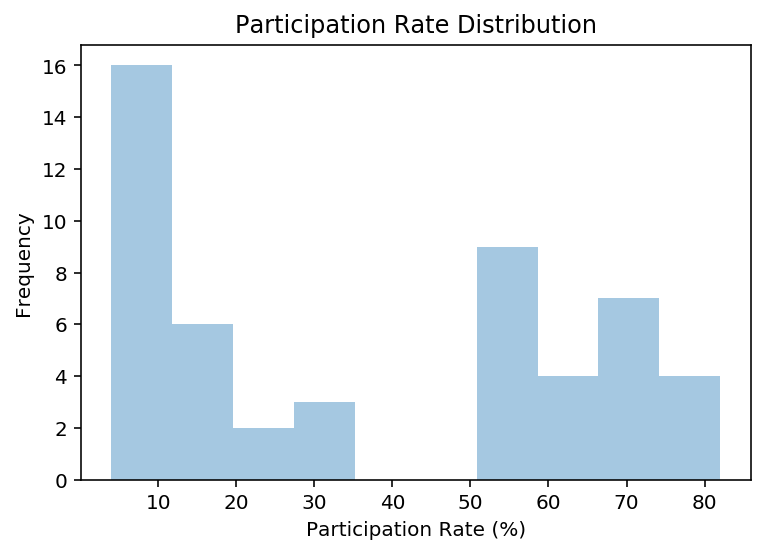

In [635]:
plt.figure(figsize=(6,4))
sns.distplot(sat['Rate'],bins=10,hist=True,kde=False)
plt.title('Participation Rate Distribution')
plt.xlabel('Participation Rate (%)')
plt.ylabel('Frequency')
plt.show()

# Participation Rate is skewed to the right


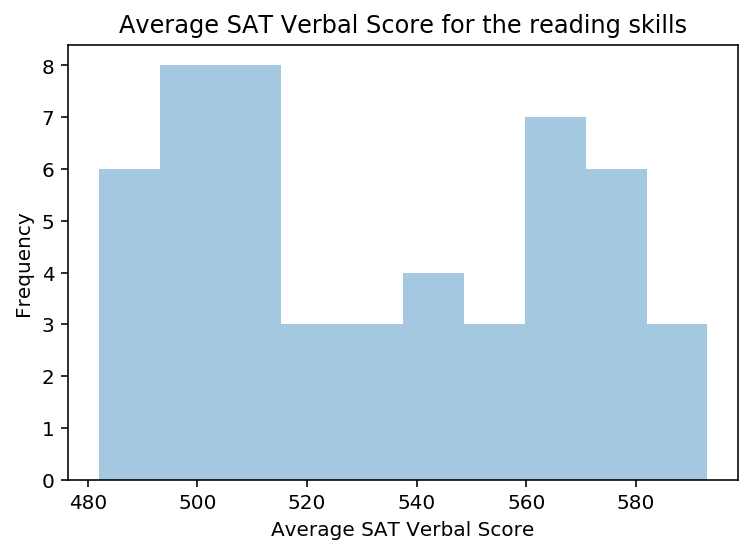

In [636]:
plt.figure(figsize=(6,4))
sns.distplot(sat['Verbal'],bins=10,hist=True,kde=False)
plt.title('Average SAT Verbal Score for the reading skills')
plt.xlabel('Average SAT Verbal Score')
plt.ylabel('Frequency')
plt.show()

# Rate is skewed to the left

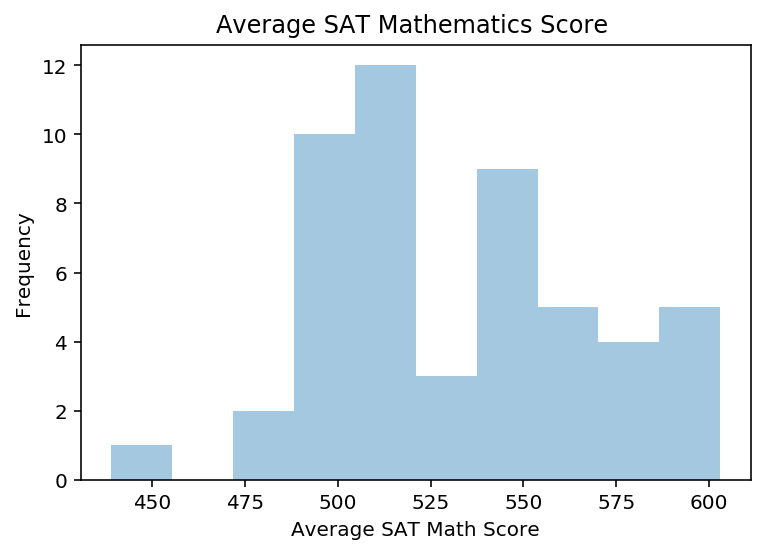

In [637]:
plt.figure(figsize=(6,4))
sns.distplot(sat['Math'],bins=10,hist=True,kde=False)
plt.title('Average SAT Mathematics Score ')
plt.xlabel('Average SAT Math Score')
plt.ylabel('Frequency')
plt.show()
# Rate is skewed to the right

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

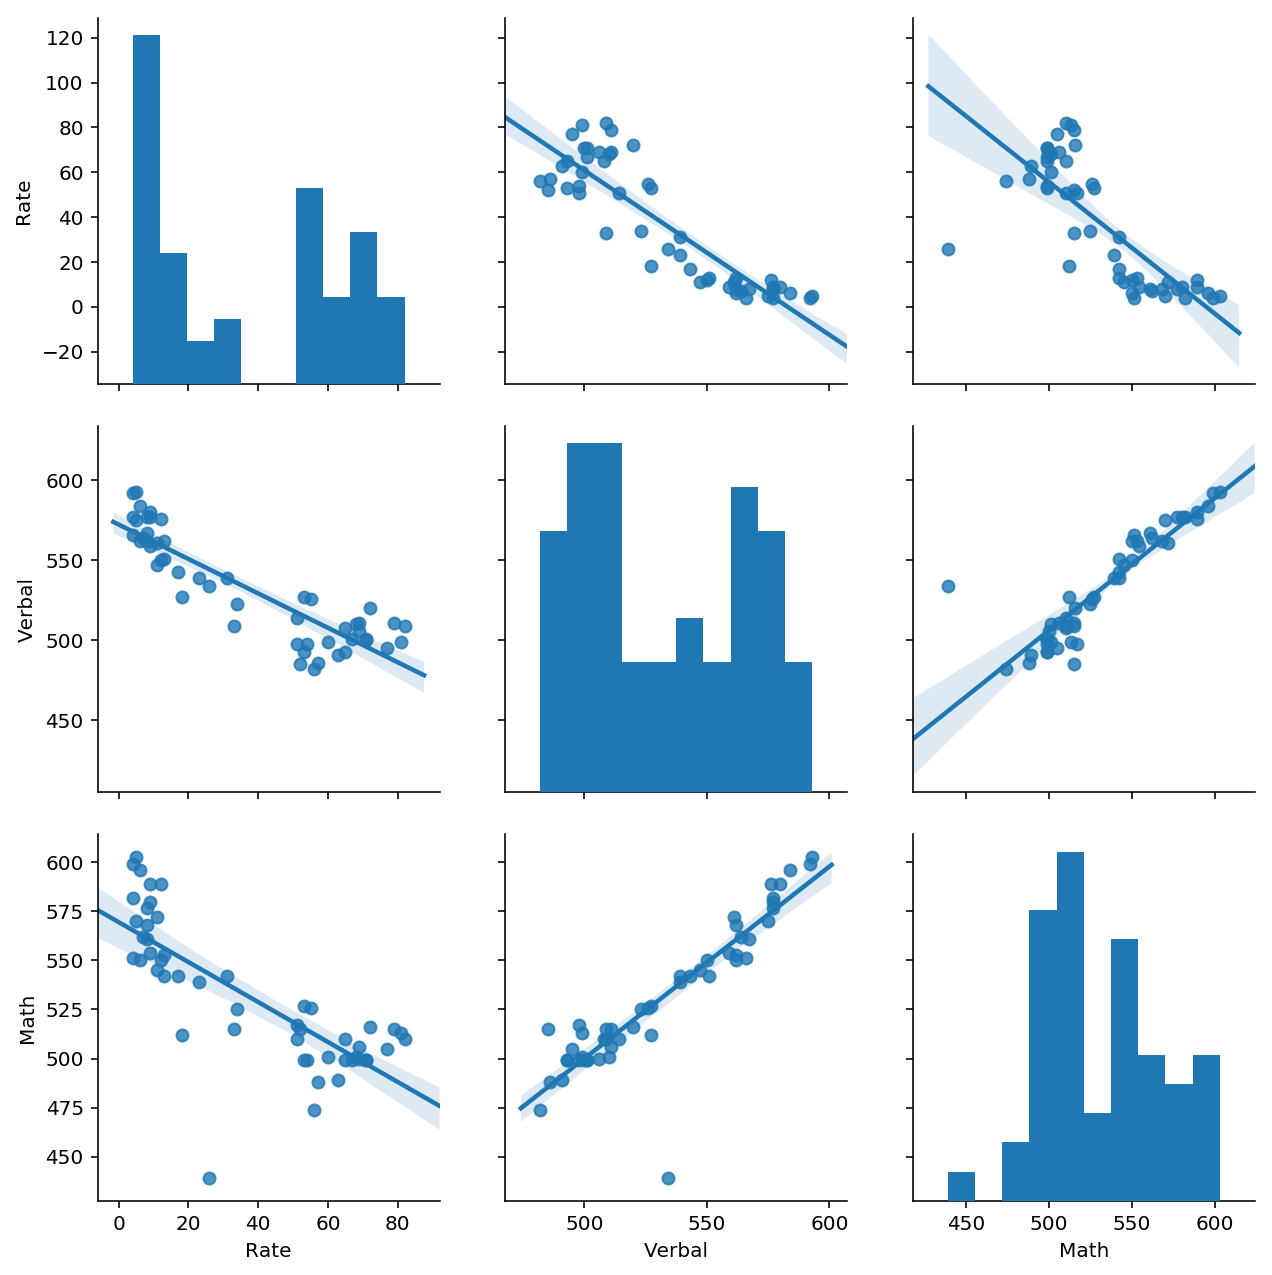

In [638]:
sns.pairplot(sat,height=3,kind="reg")

### Pearson correlation coefficient 

We can observe the following are positively correlated
- Math vs Verbal ( Approximately 1 - Strongly correlated )
- Outlier is observed

We can observe the following are negatively correlated
- Verbal vs Rate ( Approximately -0.7 Moderately correlated )
- Outlier is observed

- Math vs Rate   ( Approximately -0.7 Moderate correlated )
- Outlier is observed


![title](img/corelation.png)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

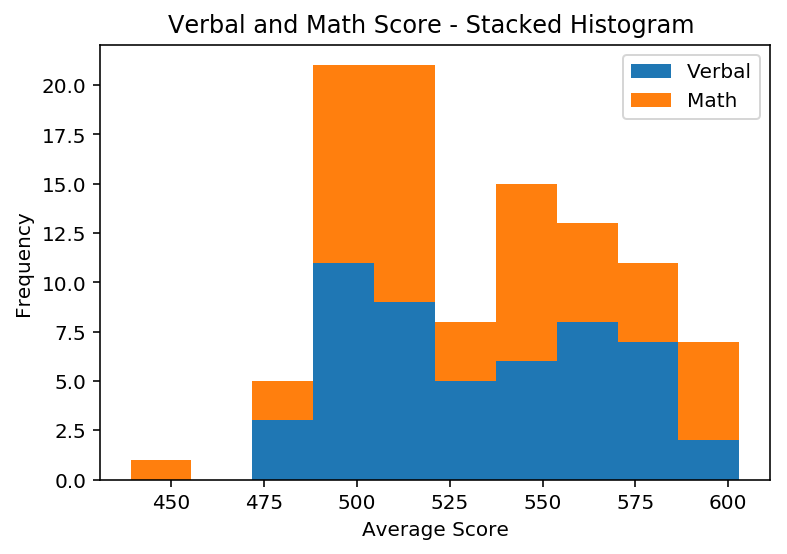

In [639]:
sat[['Verbal', 'Math']].plot.hist(stacked=True, figsize=(6,4))
plt.title('Verbal and Math Score - Stacked Histogram ')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots
#![title](img/boxplot.png)

### What are the benefits of using a boxplot as compared to a scatterplot or a histogram?
- Boxplot is able provide accurate visual representaton of the 
  - Minimum and Maximum based on the horizontal line at the extreme ends 
  - 1st Quartle , Median , 3rd Quartile which are represented inside the Box
- Able to obseve skewness and data symmetry
- Able to compare categorical variable side by side on the same graph

https://chartio.com/learn/dashboards-and-charts/what-is-a-scatter-plot/
Scatter Plot
A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables - one plotted along the x-axis and the other plotted along the y-axis.
Scatter plots are used when you want to show the relationship between two variables. 

### What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?
Values of Rate are capped below 100 ( Max is 82 to be precise ) and if you compare it between
'Math' and 'Verbal', Rate's observation is not at similar and this might disrupt data visualizaton and inspection.


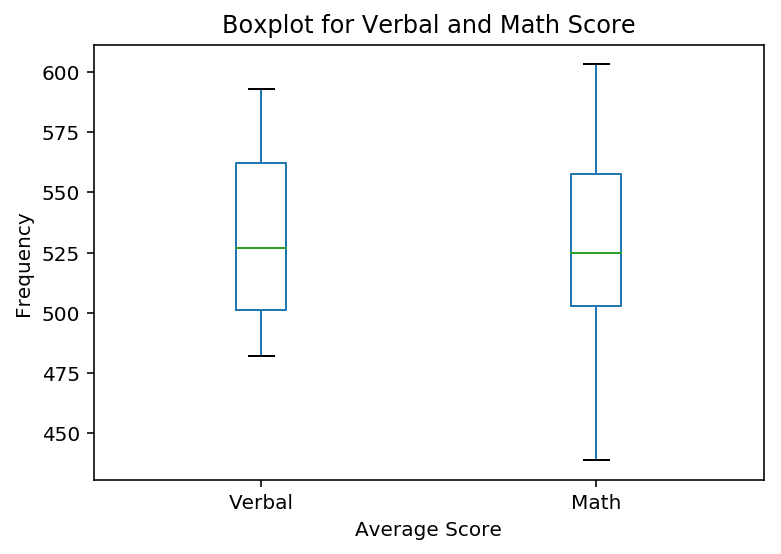

In [640]:
sat[['Verbal', 'Math']].plot.box(stacked=True, figsize=(6,4))
plt.title('Boxplot for Verbal and Math Score')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


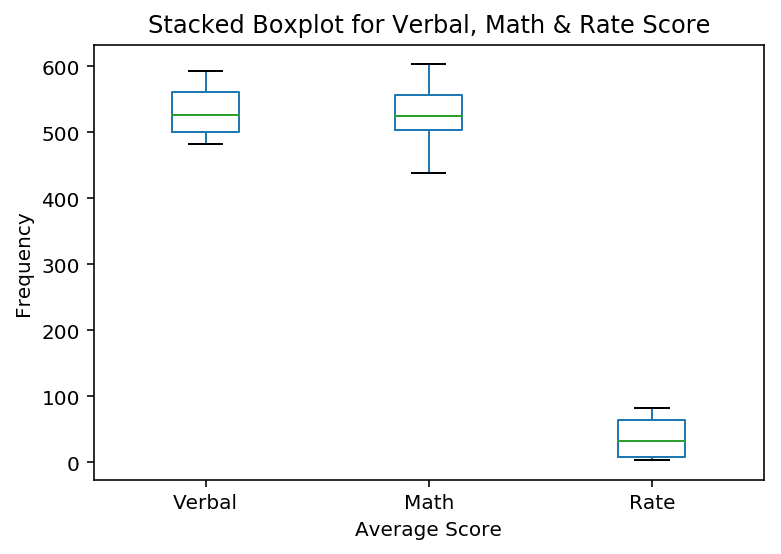

In [641]:
# The effect of plotting without normalization
sat[['Verbal', 'Math','Rate']].plot.box(stacked=True, figsize=(6,4))
plt.title('Stacked Boxplot for Verbal, Math & Rate Score')
plt.xlabel('Average Score')
plt.ylabel('Frequency')
plt.show()

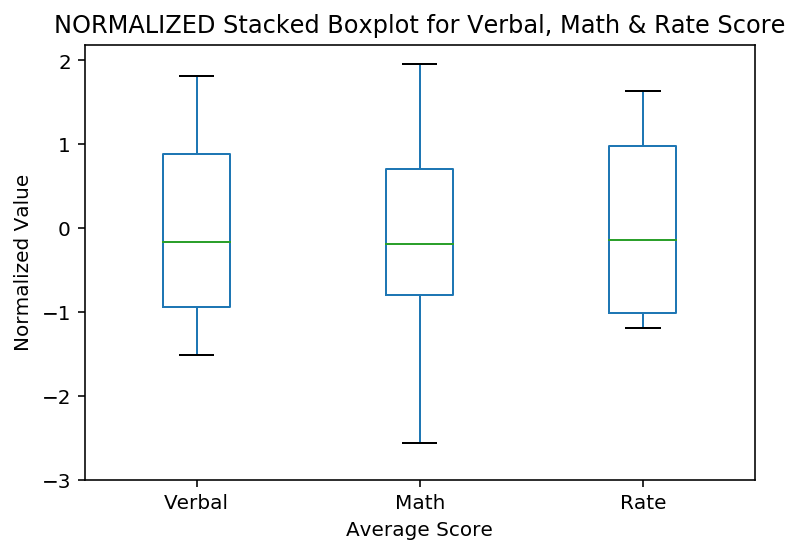

In [642]:
# The effect of plotting AFTER normalization
sat_normalized = (sat.iloc[:,1:4] - sat.mean() ) / sat.std()

sat_normalized[['Verbal', 'Math','Rate']].plot.box(stacked=True, figsize=(6,4))
plt.title('NORMALIZED Stacked Boxplot for Verbal, Math & Rate Score')
plt.xlabel('Average Score')
plt.ylabel('Normalized Value')
plt.yticks(np.arange(-3, 3, step=1))
plt.show()

In [643]:
#Sanity check to confirm mean is approximately zero and 1 for std deviation for all the 3 variables

print('Mean for all the 3 variables')
print(sat_normalized.Rate.mean())
print(sat_normalized.Verbal.mean())
print(sat_normalized.Math.mean())
print('\n-----------------------\n')
print('Std Deviation for all the 3 variables')
print(sat_normalized.Rate.std())
print(sat_normalized.Verbal.std())
print(sat_normalized.Math.std())

Mean for all the 3 variables
8.707631565687502e-18
9.44778024877094e-16
-8.424633539802658e-16

-----------------------

Std Deviation for all the 3 variables
0.9999999999999998
0.9999999999999998
1.0000000000000002


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

### How many states are above the mean? 
24 States

### What does this tell you about the distribution of `Verbal` scores?
Mean is 532 and if you compare this value with the image of BoxPlot, 
one can tell that the mean is at the center of the distribution.



In [644]:
#Number of States
print(sat.loc[(sat['Verbal'] > sat['Verbal'].mean()),'State'].count())

#List the states
sat.loc[sat['Verbal'] > sat['Verbal'].mean(),'State']

# 47% of the state has verbal scores that are greater than states average
len(sat)
sat.Verbal.mean()


24


532.5294117647059

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

### How does this compare to the list of states greater than the mean of `Verbal` scores? Why?
The number of states is 24 which is the same as the mean.
Hence, mean is the same as median and both are located at the center of the distribution. 

In [645]:
#Number of States
print(sat.loc[(sat['Verbal'] > sat['Verbal'].median()),'State'].count())

#List the states
sat.loc[sat['Verbal'] > sat['Verbal'].median(),'State']

#Median
sat['Verbal'].median()

24


527.0

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [646]:
sat['Verbal - Math']=sat['Verbal']-sat['Math']
sat.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [647]:
first_DF=sat.loc[:,['State','Verbal - Math']].sort_values('Verbal - Math', ascending=False).head(10)
first_DF.head(3)

,State,Verbal - Math
27,OH,95
50,MS,15
29,WV,15


In [648]:
sat['Math - Verbal']= sat['Math']-sat['Verbal']

second_DF=sat.loc[:,['State','Math - Verbal']].sort_values('Math - Verbal', ascending=False).head(10)
second_DF.head(3)

,State,Math - Verbal
21,HI,30
23,CA,19
1,NJ,14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

## What does the correlation matrix tell you?
The pairplot is also employed to assist with understanding the variable

- High positive relationships
Math and Verbal. When Math increases, Verbal will increase in tandem too.

- Moderate negative relationships
Math and Rate .The lower the particapation rate, the lower the Math Score.
Less significant than Verbal and Rate, though.

- High negative relationships
Verbal and Rate. The lower the particapation rate, the lower the Verbal Score.


![title](img/pairplot.png)

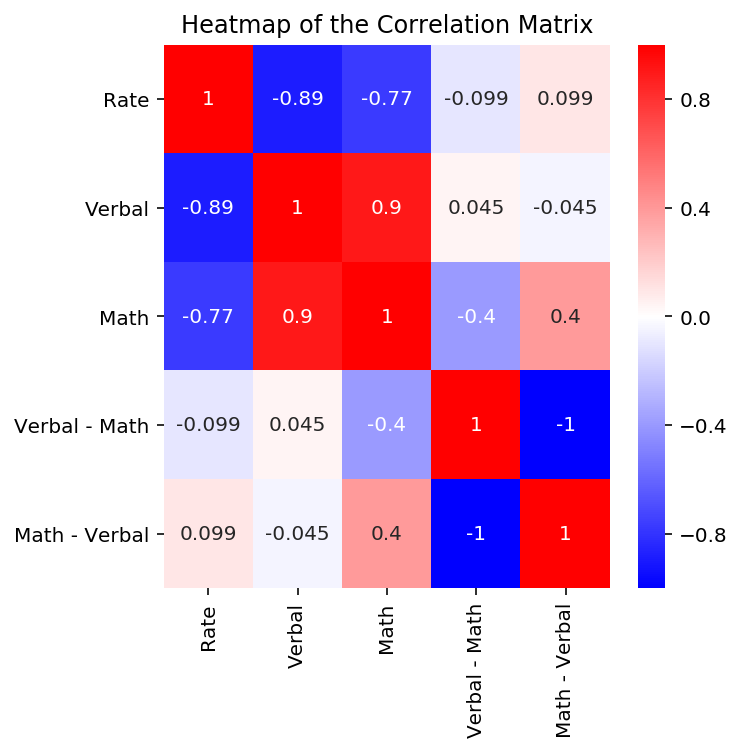

In [649]:
#chose diverging color palette to shoe the extreme ends and also the center
plt.figure(figsize=(5,5),)
sns.heatmap(sat.corr(),cmap='bwr',annot=True)
plt.title('Heatmap of the Correlation Matrix')
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.
#![title](img/normal.png)

### count: 
count number of non-NA/null observations.

### mean: 
average value of the column

### std: 
standard deviation of the column

### min: 
minimum value of the column

### 25%: 
25th percentile(1st quartile) of the column

### 50%: 
50th percentile(2nd quartile/median) of the column

### 75%: 
75th percentile(3rd quartile) of the column

### max: 
maximum value of the column

In [650]:
sat.describe()

,Rate,Verbal,Math,Verbal - Math,Math - Verbal
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275,-0.686275
std,27.550681,33.360667,36.287393,15.839811,15.839811
min,4.000000,482.000000,439.000000,-30.000000,-95.000000
25%,9.000000,501.000000,503.000000,-6.000000,-4.500000
50%,33.000000,527.000000,525.000000,0.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000,6.000000
max,82.000000,593.000000,603.000000,95.000000,30.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

### 6.3.1.

#### Formula for Covariance
![title](img/covariance1.png)

#### Formula for Correlation
![title](img/fcorrelation.png)

### 6.3.2 Key Differences Between Covariance and Correlation

-Covariance is used to indicate the extent to which two random variables change in tandem . 
Correlation is a measure used to represent how strongly two random variables are related.

-Covariance is nothing but a measure of correlation. Also, Covariance measures the direction but not the strength.
On the contrary, correlation refers to the scaled form of covariance.

-The value of correlation takes place between -1 and +1. Conversely, the value of covariance lies between -∞ and +∞.

-Covariance is affected by the change in scale, i.e. if all the value of one variable is multiplied by a constant and all the value of another variable are multiplied, by a similar or different constant, then the covariance is changed. As against this, correlation is not influenced by the change in scale.

-Correlation is dimensionless, i.e. it is a unit-free measure of the relationship between variables. Unlike covariance, where the value is obtained by the product of the units of the two variables.

### 6.3.2. Relationship between Covariance and Correlation
![title](img/covariance3.png)

From the formula, Covariance can be converted to Correlation by dividing with -σX & -σY.

Where:

-ρ(X,Y) – the correlation between the variables X and Y

-Cov(X,Y) – the covariance between the variables X and Y

-σX – the standard deviation of the X-variable

-σY – the standard deviation of the Y-variable

### 3. Why correlation is preffered?
Correlation is preferred is because it's dimensionless and comparison can be made between the each other( i.e Co-relation of math vs verbal and math vs state ). Besides Correlation is not affected by the change in scale 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. 

Does this data require cleaning? 

Yes, because the following are string instead of integer/float.<br>
cocaine-frequency           object<br>
crack-frequency             object<br>
heroin-frequency            object<br>
inhalant-frequency          object<br>
oxycontin-frequency         object<br>
meth-frequency              object<br>

Are variables missing? 
Yes, there are some observations that are missing

How will this affect your approach to EDA on the data?
But, it's correctable easily because 'type of drug use' is '-', hence the XX-frequency is 0.
Just replace it with 0. For example if crack-use is 0 then crack-frequency is 0.


In [651]:
#load dataset
drug = pd.read_csv('.\datasets\drug-use-by-age.csv') 

#adjust pd options to display more details at the output
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 600)
pd.set_option('display.width', 1200)

drug #display DF

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


###  Data Dictionary

#### Column - Description

alcohol-use	Percentage of those in an age group who used alcohol in the past 12 months
<br>alcohol-frequency	Median number of times a user in an age group used alcohol in the past 12 months

marijuana-use	Percentage of those in an age group who used marijuana in the past 12 months
<br>marijuana-frequency	Median number of times a user in an age group used marijuana in the past 12 months

cocaine-use	Percentage of those in an age group who used cocaine in the past 12 months
<br>cocaine-frequency	Median number of times a user in an age group used cocaine in the past 12 months

crack-use	Percentage of those in an age group who used crack in the past 12 months
<br>crack-frequency	Median number of times a user in an age group used crack in the past 12 months

heroin-use	Percentage of those in an age group who used heroin in the past 12 months
<br>heroin-frequency	Median number of times a user in an age group used heroin in the past 12 months

hallucinogen-use	Percentage of those in an age group who used hallucinogens in the past 12 months
<br>hallucinogen-frequency	Median number of times a user in an age group used hallucinogens in the past 12 months

inhalant-use	Percentage of those in an age group who used inhalants in the past 12 months
<br>inhalant-frequency	Median number of times a user in an age group used inhalants in the past 12 months

pain-releiver-use	Percentage of those in an age group who used pain relievers in the past 12 months
<br>pain-releiver-frequency	Median number of times a user in an age group used pain relievers in the past 12 months

oxycontin-use	Percentage of those in an age group who used oxycontin in the past 12 months
<br>oxycontin-frequency	Median number of times a user in an age group used oxycontin in the past 12 months

tranquilizer-use	Percentage of those in an age group who used tranquilizer in the past 12 months
<br>tranquilizer-frequency	Median number of times a user in an age group used tranquilizer in the past 12 months

stimulant-use	Percentage of those in an age group who used stimulants in the past 12 months
<br>stimulant-frequency	Median number of times a user in an age group used stimulants in the past 12 months

meth-use	Percentage of those in an age group who used meth in the past 12 months
<br>meth-frequency	Median number of times a user in an age group used meth in the past 12 months

sedative-use	Percentage of those in an age group who used sedatives in the past 12 months
<br>sedative-frequency	Median number of times a user in an age group used sedatives in the past 12 months

In [652]:
drug.shape # 17 rows and 28 columns determine total rows and columns of the dataframe.

(17, 28)

In [653]:
drug.info() #check for null values and also column datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [654]:
# Display columns that are string( dtypes == 'object' ).
drug.select_dtypes(include=['object']).head()

,age,cocaine-frequency,crack-frequency,heroin-frequency,inhalant-frequency,oxycontin-frequency,meth-frequency
0,12,5.0,-,35.5,19.0,24.5,-
1,13,1.0,3.0,-,12.0,41.0,5.0
2,14,5.5,-,2.0,5.0,4.5,24.0
3,15,4.0,9.5,1.0,5.5,3.0,10.5
4,16,7.0,1.0,66.5,3.0,4.0,36.0


In [655]:
drug.loc[0,'crack-frequency'] # return value is '-'

'-'

In [656]:
#replace column 1 to end => '-' with 0 from column 1 to end
drug.replace("-","0",inplace=True)

In [657]:
drug.head() #check DF after replacement is done

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,0,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [658]:
#convert to float from column 1 to end
drug.iloc[:,1:]=drug.iloc[:,1:].applymap(lambda x : float(x))

In [659]:
drug.info() #check DF after replacement is done

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null float64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null float64
crack-use                  17 non-null float64
crack-frequency            17 non-null float64
heroin-use                 17 non-null float64
heroin-frequency           17 non-null float64
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null float64
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxyco

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [660]:
#rename column 'n' to 'number'
drug.rename(columns={'n':'number'}, inplace=True)

In [661]:
require=[]
for element in list(drug.columns): #create a list of columns that I want
    if 'use' in element:          #which is all the columns with *frequency
        require.append(element)

drugu=drug.loc[:,require] # create a new df with the columns that I extracted from the for loop

drugu.head() #first DF ( drugu) with only drugs use %

## I'm going to make 3 DF to combine into 1

#first DF ( drugu) with only drugs use %
#second DF ( drugfa) with only age
#third DF ( drugb) with only the sample size number

# I will multiply ( drugu * drugb ) and add to drugfa(FINAL form)

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


In [662]:
drug['age']=drugf.age.str.slice(stop=2) #extract number to convert it into INT later on

In [663]:
#convert age to int, so that it can be included in heatmap
drug['age']=drug.age.astype('int64') 

In [664]:
drugfa=drug.iloc[:,0:1] 
drugfa.head() #second DF ( drugfa) with only age


,age
0,12
1,13
2,14
3,15
4,16


In [665]:
drug.dtypes

age                          int64
number                     float64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [666]:
#third DF ( drugb) with only the sample size number

drugb=drug.copy()
drugb=drug.iloc[:,0:2]
drugc=drugb 

drugb.drop('age',axis=1,inplace=True)

drugb.head()

,number
0,2798.0
1,2757.0
2,2792.0
3,2956.0
4,3058.0


In [667]:
#create a new DF by multiplying drugb(sample size) * drugu ( % drug use)

for column in list(drugu.columns):
       drugfa[column]=drugb['number']*drugu[column]

drugfa #FINAL FORM

,age,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,10912.2,3077.8,279.8,0.0,279.8,559.6,4476.8,5596.0,279.8,559.6,559.6,0.0,559.6
1,13,23434.5,9373.8,275.7,0.0,0.0,1654.2,6892.5,6616.8,275.7,827.1,827.1,275.7,275.7
2,14,50535.2,24290.4,279.2,0.0,279.2,4467.2,7259.2,10888.8,1116.8,2512.8,2233.6,279.2,558.4
3,15,86315.2,42862.0,1478.0,295.6,591.2,6207.6,7390.0,16258.0,2364.8,5912.0,4434.0,886.8,1182.4
4,16,122625.8,68805.0,3058.0,0.0,305.8,10397.2,9174.0,18959.6,3363.8,7339.2,5504.4,917.4,611.6
5,17,149773.4,85064.0,6076.0,303.8,303.8,14582.4,6076.0,25823.0,4253.2,10633.0,8506.4,1822.8,1519.0
6,18,144930.3,83205.3,7900.8,987.6,987.6,17283.0,4444.2,22714.8,4197.3,12098.1,7407.0,1234.5,987.6
7,19,143605.8,74248.2,9114.3,1111.5,1111.5,19117.8,3112.2,20896.2,3334.5,9336.6,7335.9,889.2,666.9
8,20,158288.7,77214.0,11127.9,1362.6,2043.9,16805.4,3406.5,22710.0,3860.7,12263.4,9084.0,2043.9,1135.5
9,21,195852.8,77682.0,11299.2,1177.0,1412.4,14830.2,3295.6,21186.0,3060.2,9180.6,9651.4,1412.4,706.2


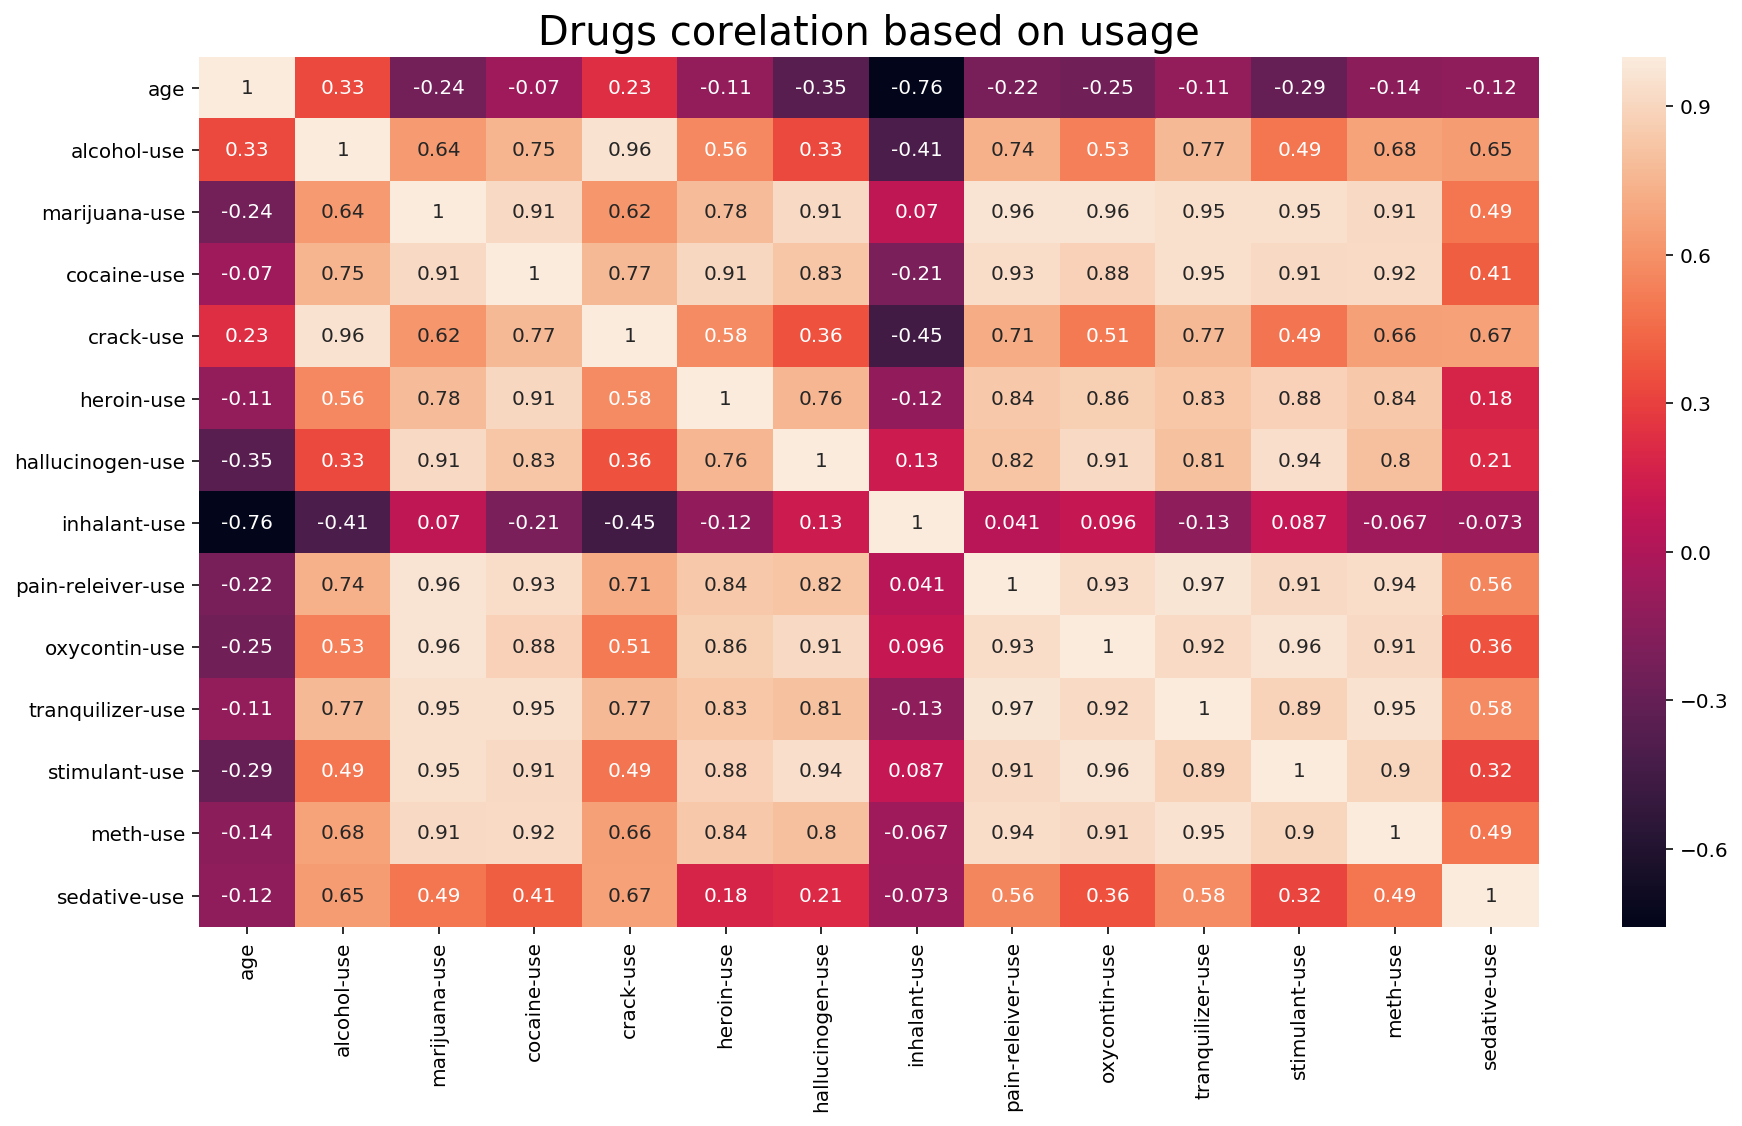

In [668]:
plt.figure(figsize=(15,8))
plt.title('Drugs corelation based on usage',fontsize = 20)
sns.heatmap(drugfa.corr(),annot=True)

*Age has little relation with drugs exception for stimulant<br>
*When one drinks alchohol(legal and not a drug ), likelyhood that one will be involved with crack(high corelation) ,( moderately high ) cocaine, pain-releiver, tranquilizer and marijuana.<br>
*Except sedative,crack and inhalant, the rest of the drugs are highly co-related with each  other. Once you try them , you would have tried the rest of the drugs.<br>

In [669]:
pd.options.mode.chained_assignment = None  # default='warn'

#Derive new feature( segmentation ) based on generation as below
#Also, Gen-Z is split to Gen-Z School as I want to understand the trend for non-Adults

#Assigning generations based on rows
drugfa.loc[16,'generation']= 'Silent' #65+ 
drugfa.loc[15,'generation']= 'Baby boomers' #50-64
drugfa.loc[14,'generation']= 'Gen-X' #35-49
drugfa.loc[12:13,'generation']= 'Millenials' #26-34
drugfa.loc[7:11,'generation']= 'Gen-Z' #19-25
drugfa.loc[:6,'generation']= 'Gen-Z(Schl)' #18-12

#to be used later
alcohol_t_test = drugfa['alcohol-use'].values

In [670]:
drugfa.drop('age',inplace=True,axis=1)

In [671]:
drugfa.head()

,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use,generation
0,10912.2,3077.8,279.8,0.0,279.8,559.6,4476.8,5596.0,279.8,559.6,559.6,0.0,559.6,Gen-Z(Schl)
1,23434.5,9373.8,275.7,0.0,0.0,1654.2,6892.5,6616.8,275.7,827.1,827.1,275.7,275.7,Gen-Z(Schl)
2,50535.2,24290.4,279.2,0.0,279.2,4467.2,7259.2,10888.8,1116.8,2512.8,2233.6,279.2,558.4,Gen-Z(Schl)
3,86315.2,42862.0,1478.0,295.6,591.2,6207.6,7390.0,16258.0,2364.8,5912.0,4434.0,886.8,1182.4,Gen-Z(Schl)
4,122625.8,68805.0,3058.0,0.0,305.8,10397.2,9174.0,18959.6,3363.8,7339.2,5504.4,917.4,611.6,Gen-Z(Schl)


Text(0, 0.5, 'Mean Percentage (%)')

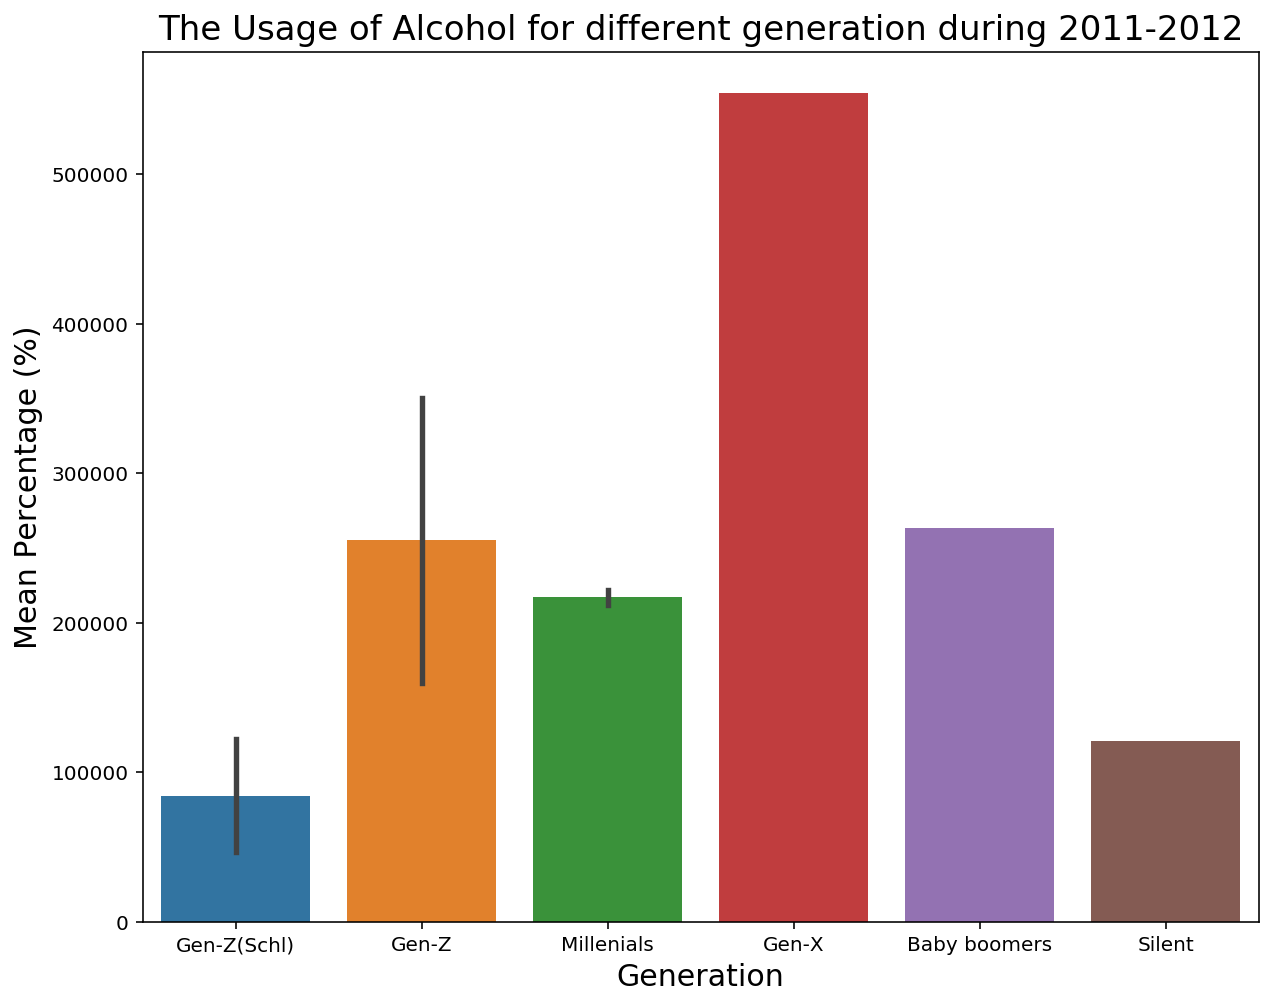

In [672]:
plt.figure(figsize=(10,8))
sns.barplot(x='generation', y='alcohol-use', data=drugfa)
plt.title('The Usage of Alcohol for different generation during 2011-2012',fontsize = 17)
plt.xlabel('Generation',fontsize = 15)
plt.ylabel('Mean Percentage (%)',fontsize = 15)

*Gen-X drinks the most alcohol, Gen-Z and Baby boomers are pretty similar <br>
*Using 70% as a cutoff point, the high usage groups are Gen-Z, Millenials and Gen-X<br>
*Obvious that Gen-Z ( schooling ) has the least exposure<br>

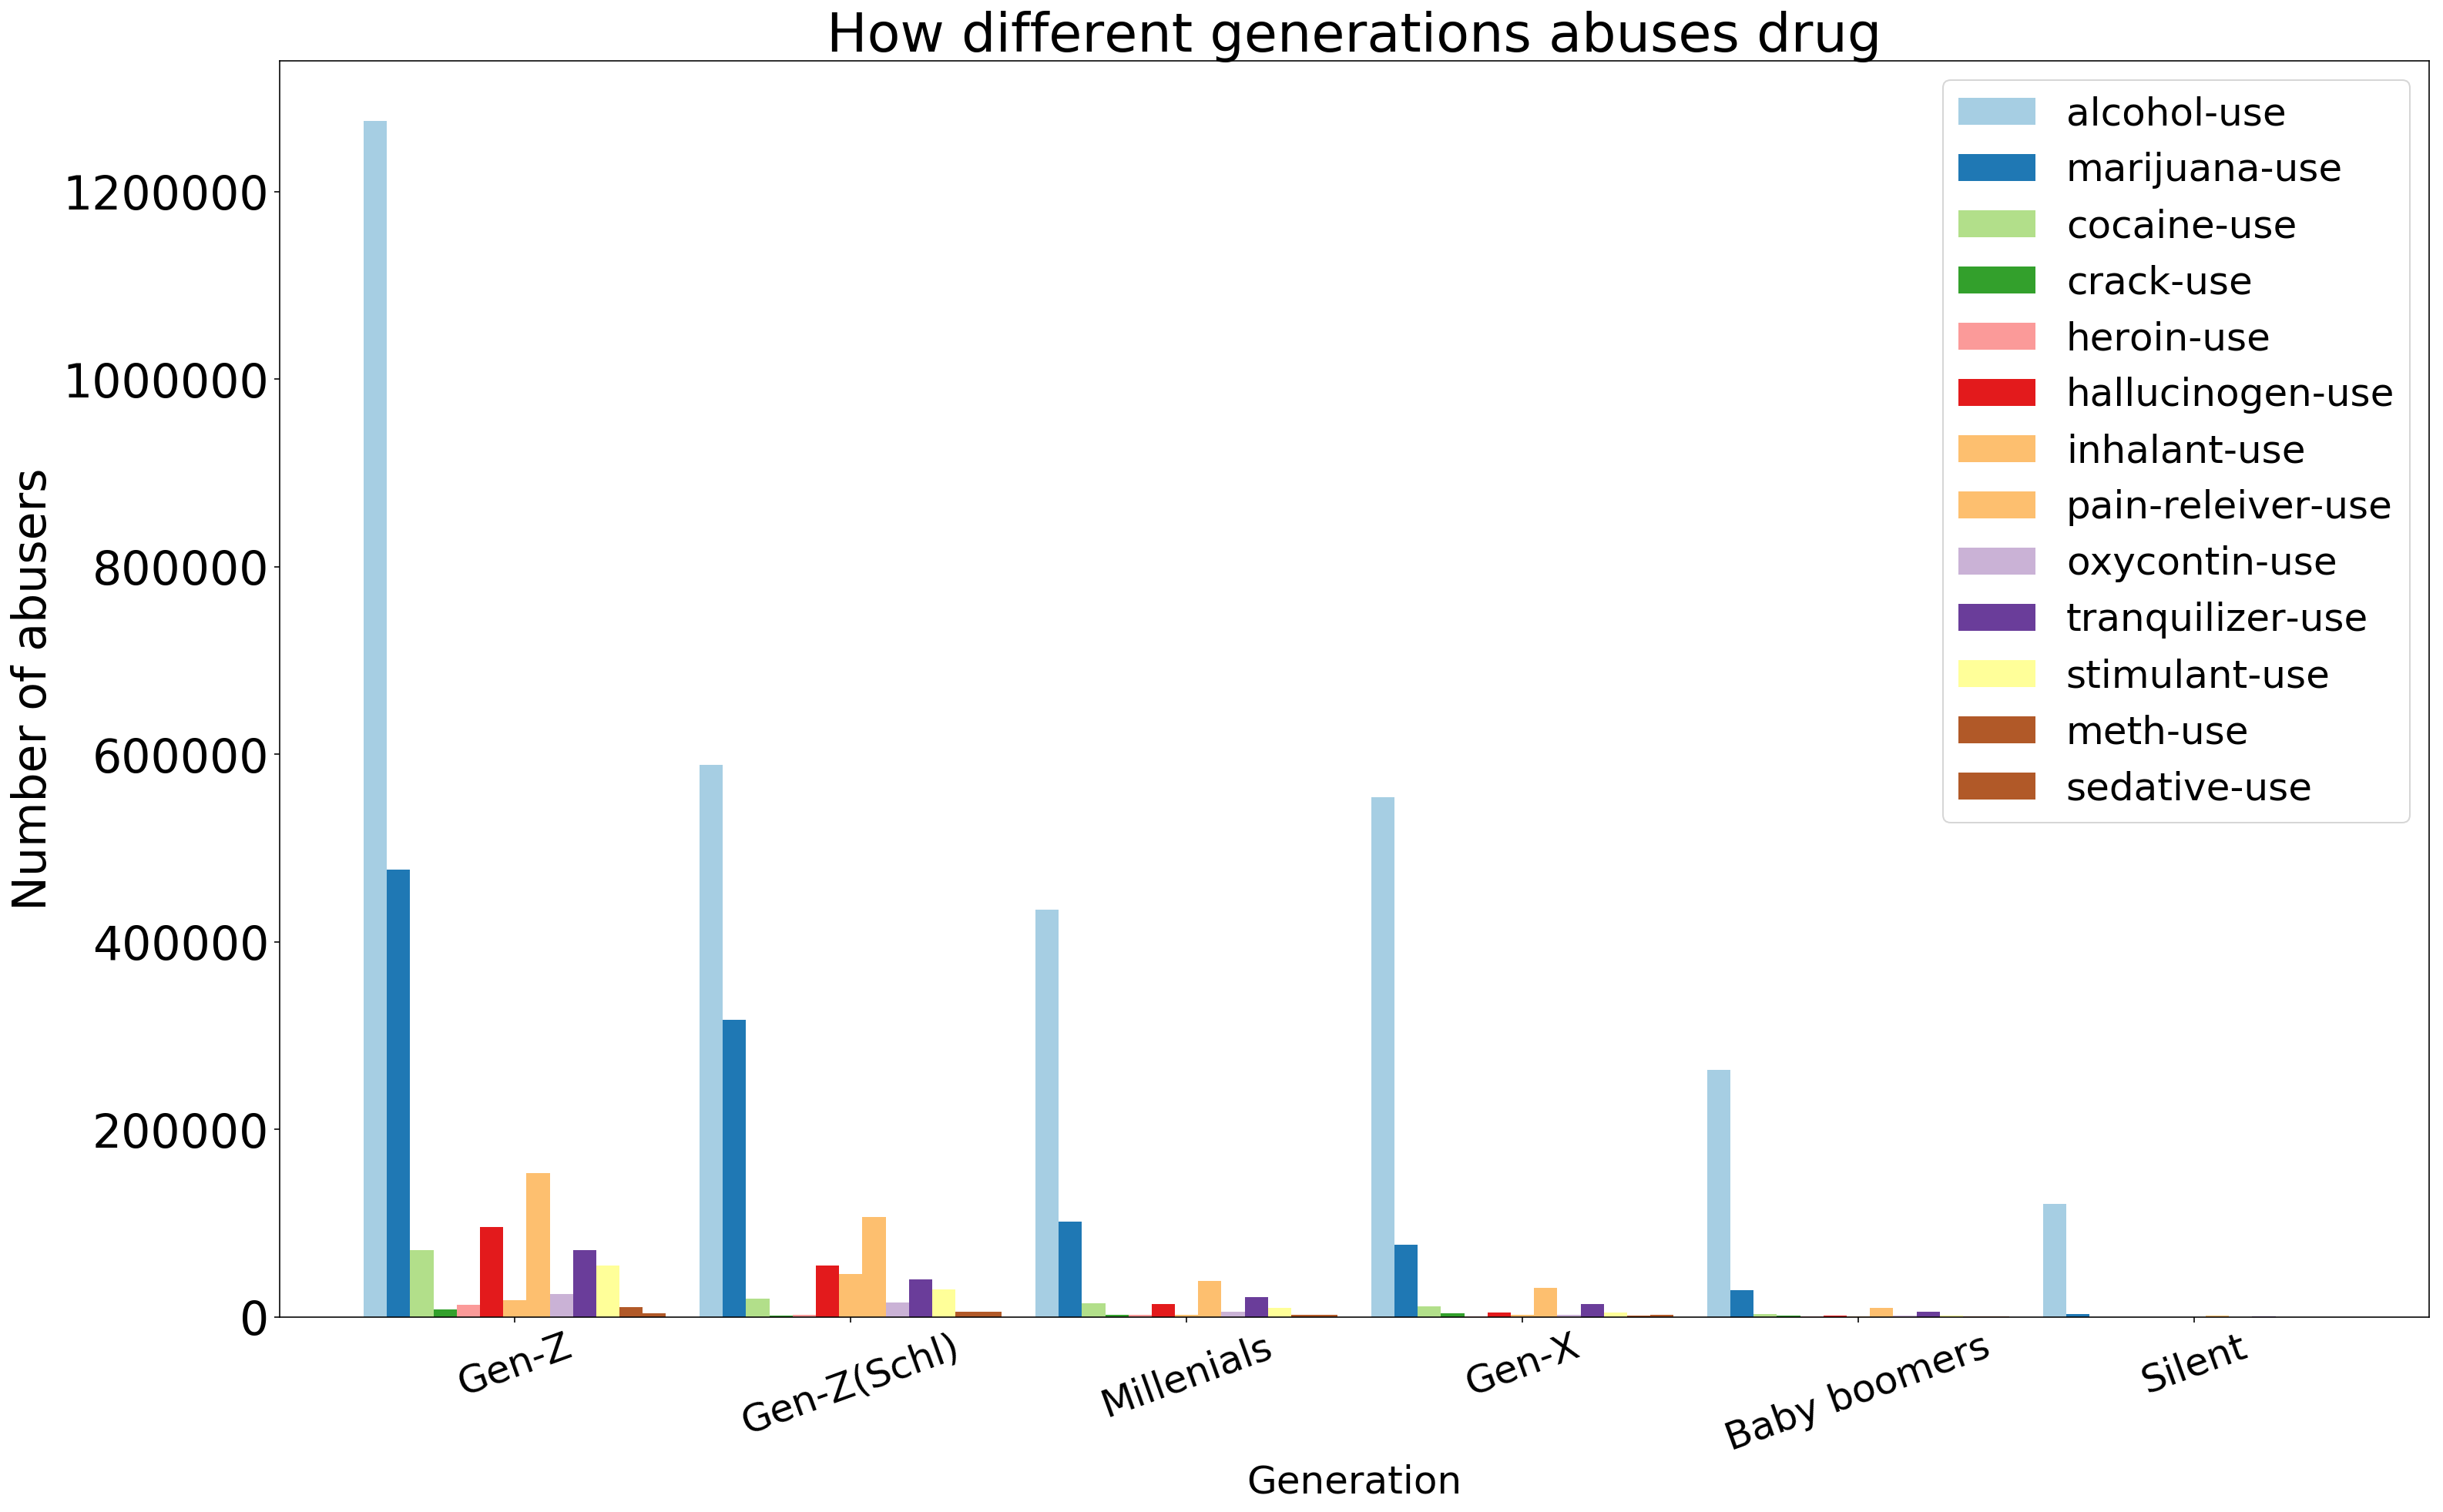

In [673]:
drugfa.groupby('generation').sum().sort_values(by='marijuana-use', ascending=False).plot(kind='bar',width=.9,figsize=(25,15),colormap='Paired')
plt.title('How different generations abuses drug',fontsize = 35)
plt.xlabel('Generation', fontsize = 25)
plt.ylabel('Number of abusers',fontsize = 30)
plt.xticks(rotation=20, fontsize = 25)
plt.yticks(fontsize = 30)
plt.legend(loc=1, prop={'size': 25})

In [674]:
drugfa.drop('alcohol-use',inplace=True,axis=1) #*Alcohol removed from the chart as it's not a drug

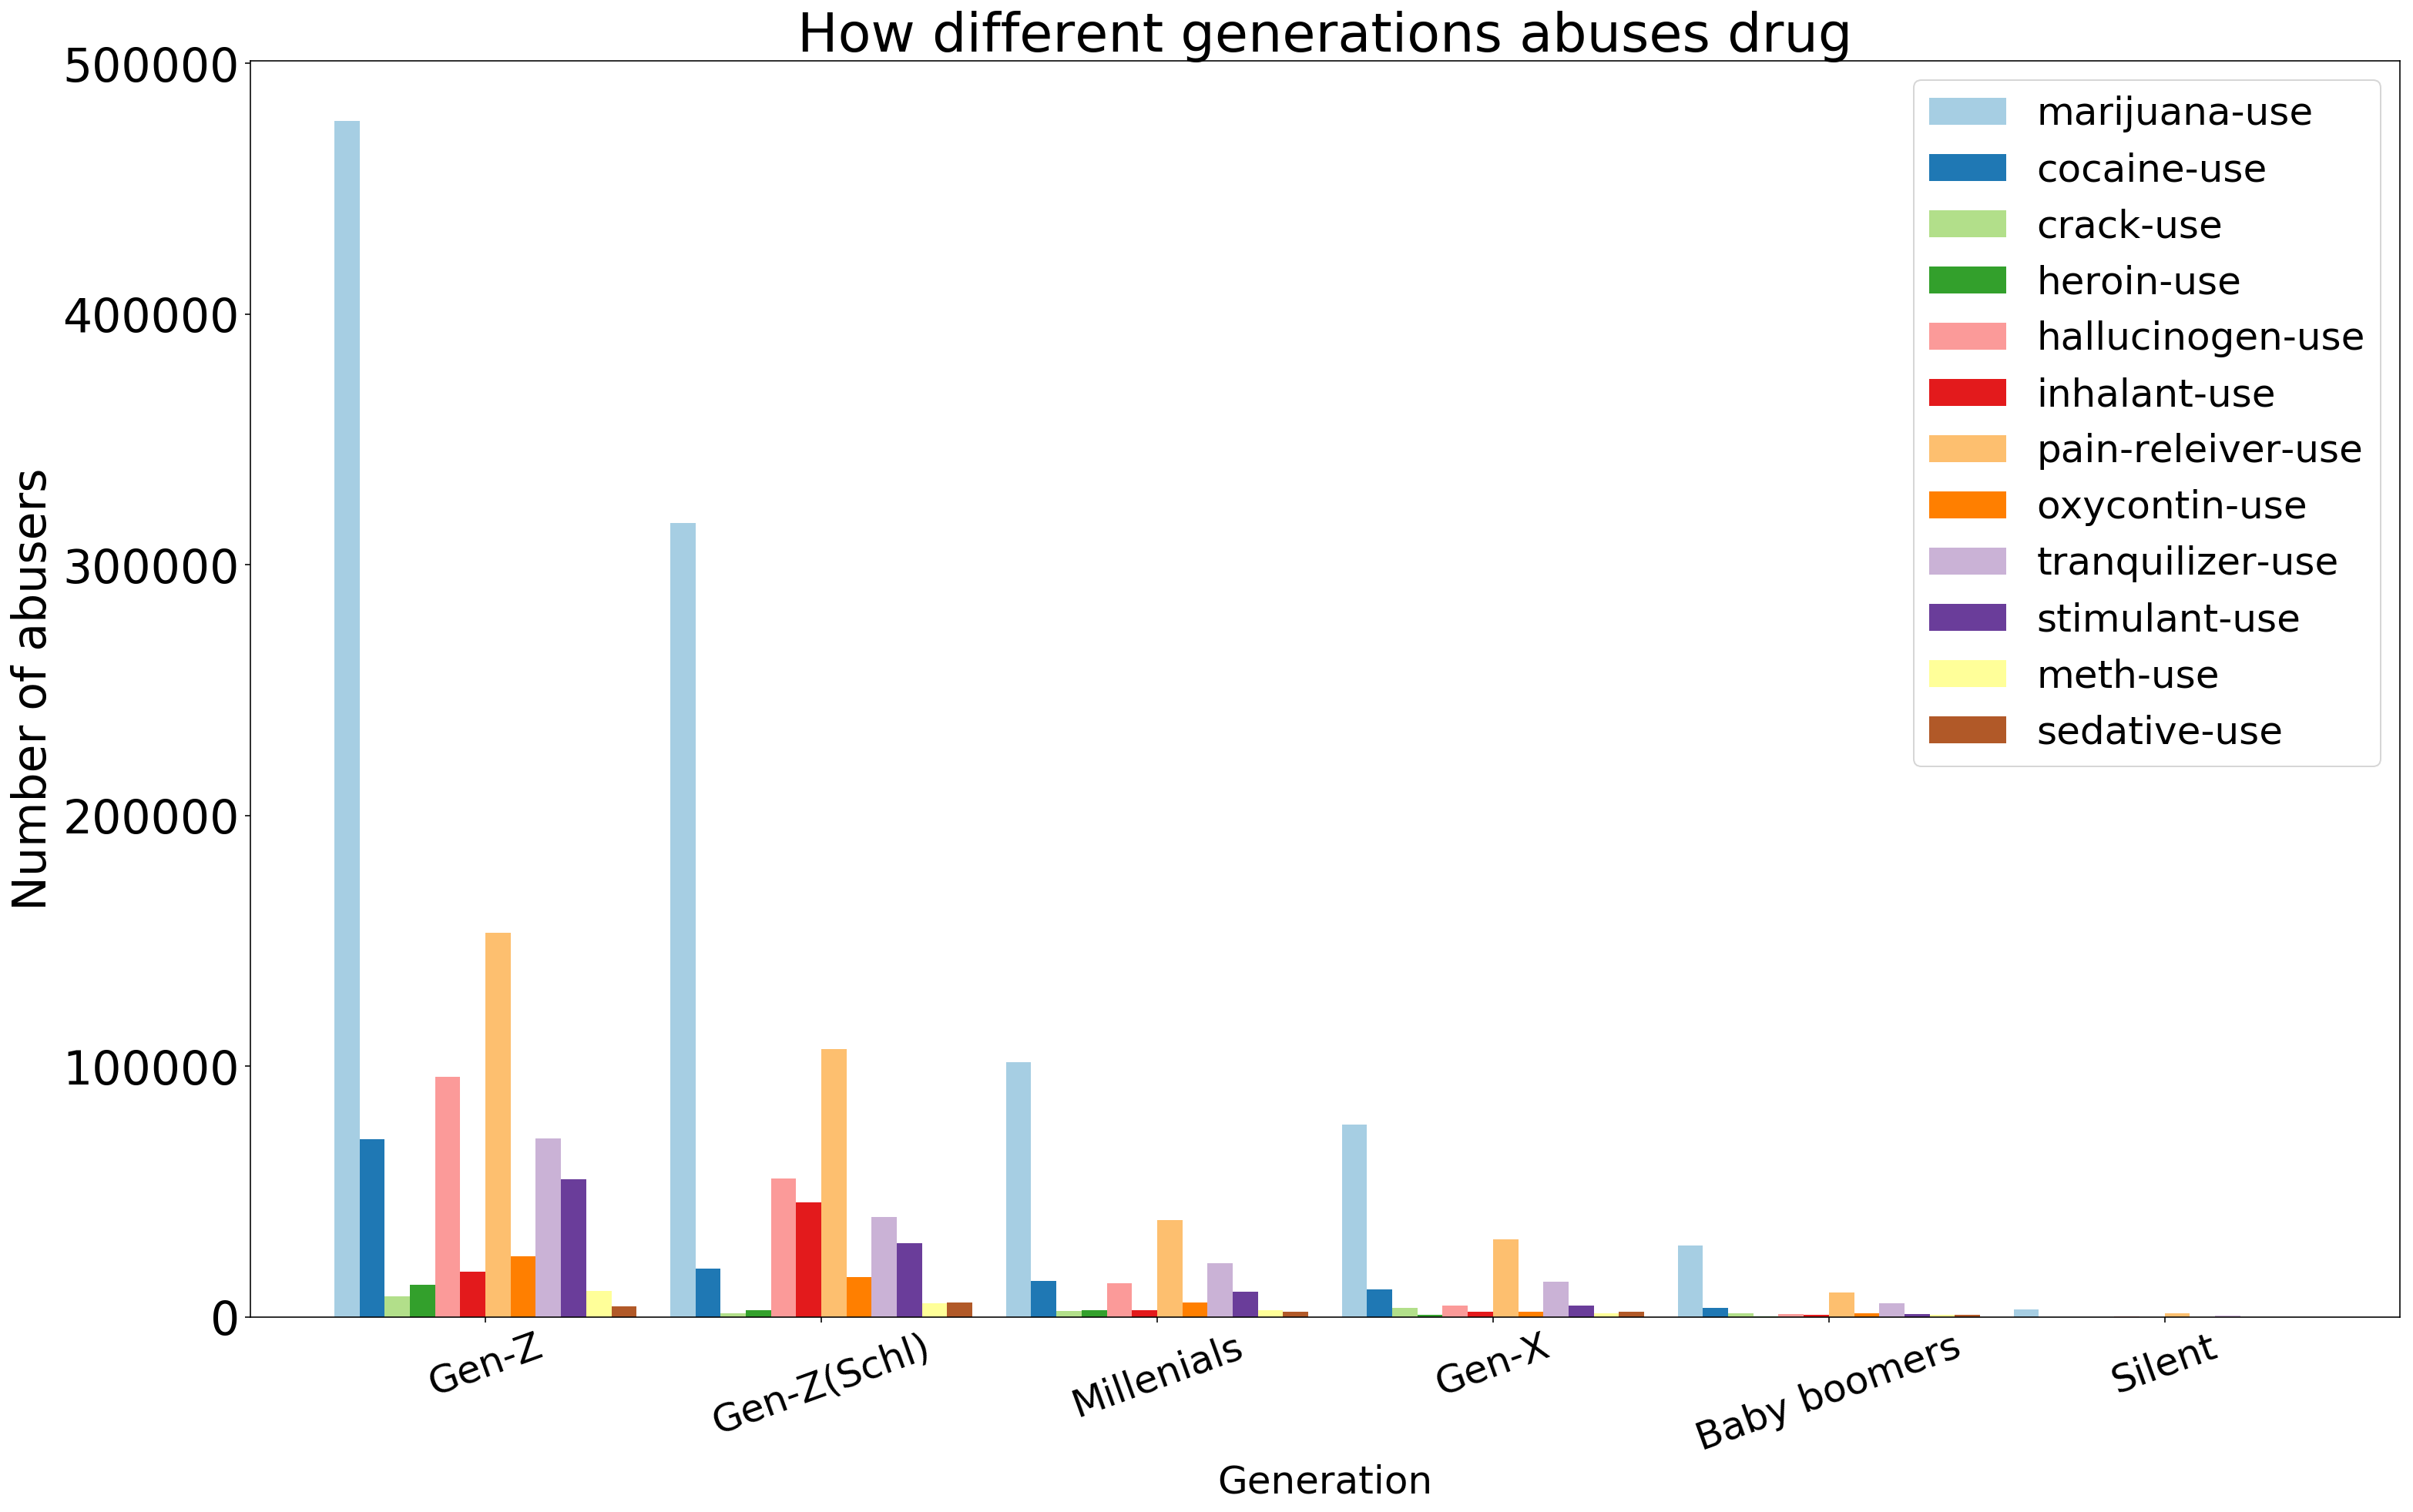

In [675]:
drugfa.groupby('generation').sum().sort_values(by='marijuana-use', ascending=False).plot(kind='bar',width=.9,figsize=(25,15),colormap='Paired')
plt.title('How different generations abuses drug',fontsize = 35)
plt.xlabel('Generation', fontsize = 25)
plt.ylabel('Number of abusers',fontsize = 30)
plt.xticks(rotation=20, fontsize = 25)
plt.yticks(fontsize = 30)
plt.legend(loc=1, prop={'size': 25})

*Gen-Z is the highest consumption of all drugs<br>
*Number of cocain abusers for Gen-Z , superceeds the combination of the rest of the categories 
*Marijuana,Pain Releiver, Hallucinogen, Cocaine and tranquilizer abuse are the highest among all categories<br>
*Suprising to see Gen-Z(ranked 2nd) who are still Schooling, are taking drugs and should be controlled. Clamp down based on marijuana and pain releiver as these are highest.

### Inference about dataset

##### Age has no relationship with usage of drugs<br>
##### When one drinks alcohol, high chance they will be involved with crack and tranquilizer<br>
##### Except sedative,crack and inhalant, the rest of the drugs are highly co-related with each other. Once you try them , you would have tried the rest of the drugs.<br>
##### Alcohol are highly consumed by Gen-Z, Millenials and Gen-X<br>
##### Gen-Z is the highest consumption of all drugs as opposed to Baby Boomers.<br>
##### Marijuana,Pain Reliever, Tranquilizer and Cocaine abuse is the highest among all categories.<br>
##### Suprising to see Gen-Z who are still Schooling,ranked 3rd, are taking drugs and should be controlled. Clamp down based on marijuana and pain releiver as these are highest

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### Statement : Alcohol Usage is the same as Marijuana 

Question: Is the Alcohol usage is the same as Marijuana? 
( Compare the top 2 )

H0 = Alcohol usage is the same as Marijuana <br>
H1 = Alcohol usage is different from Marijuana

In [676]:
#alcohol already asssigned at the top
marijuana = drugfa['marijuana-use'].values

t,p = stats.ttest_ind(marijuana,alcohol) #incumbent = alcohol
print('t-statistic={}, p-value={}'.format(t, p))

t-statistic=6.484638845081432, p-value=2.6887000754105407e-07


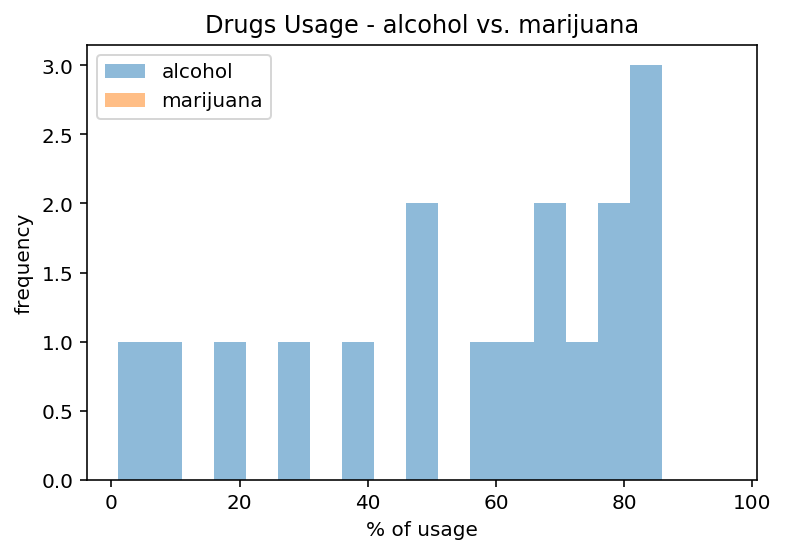

In [677]:
val,bins,_ = plt.hist(alcohol, bins=range(1,100,5), alpha=0.5, label='alcohol')
plt.hist(marijuana, bins=range(1,100,5), alpha=0.5, label='marijuana')
plt.legend()
plt.title('Drugs Usage - alcohol vs. marijuana')
plt.xlabel('% of usage')
plt.ylabel('frequency')
plt.show()

#### **Report**


Conclusions:

p<0.05<br>
We can reject the null hypothesis (H0) <br>
It is a statistically significant difference between the Alcohol and Marijuana <br>
The usage of alcohol and marijuana is different <br>

### Statement : Heroin Usage is the same as Meth 

Question: Is the Heroin usage  the same as Meth?
( Compare the 2 of the most dangerous drug )
https://www.independent.co.uk/news/uk/home-news/from-krokodil-to-purple-drank-the-worlds-10-most-deadly-street-drugs-a6719541.html
    
H0 = Heroin usage is the same as Meth<br>
H1 = Heroin usage is different from Meth

In [678]:
heroin = drugfa['heroin-use'].values
meth = drugfa['meth-use'].values

t,p = stats.ttest_ind(meth,heroin) #incumbent = heroin
print('t-statistic={}, p-value={}'.format(t, p))

t-statistic=0.18489652637826684, p-value=0.8544770814372625


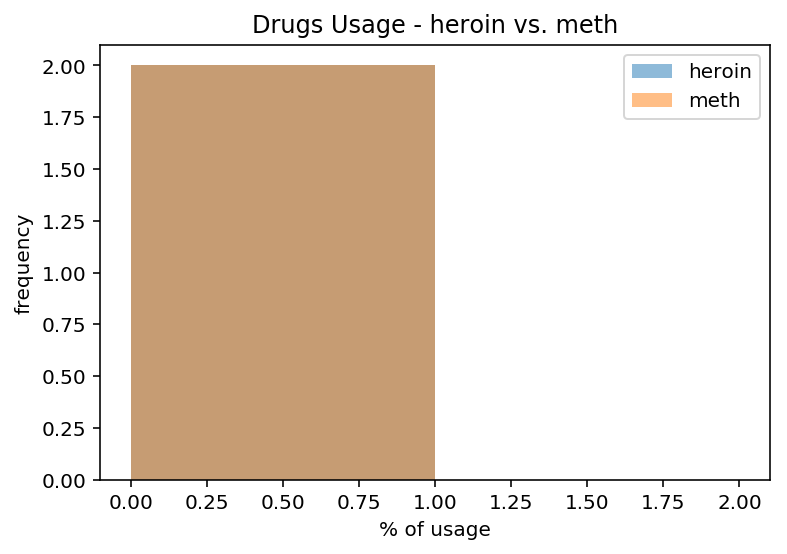

In [679]:
val,bins,_ = plt.hist(heroin, bins=range(0,3), alpha=0.5, label='heroin')
plt.hist(meth, bins=range(0,3), alpha=0.5, label='meth')
plt.legend()
plt.title('Drugs Usage - heroin vs. meth')
plt.xlabel('% of usage')
plt.ylabel('frequency')
plt.show()

#### **Report**

Conclusions:

p>0.05<br>
We cannot reject the null hypothesis (H0) <br>

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [680]:
sat2=pd.read_csv('.\datasets\sat_scores.csv') #load csv to pandas
sat2.head()
sat2.drop(columns=['State','Rate'],inplace=True, axis=1)
sat2.head()

,Verbal,Math
0,509,510
1,499,513
2,511,515
3,495,505
4,520,516


In [681]:
sat2['Z-score_Verbal']=stats.zscore(sat2['Verbal'])
sat2['Z-score_Math']=stats.zscore(sat2['Math'])

In [682]:
sat2.head()

,Verbal,Math,Z-score_Verbal,Z-score_Math
0,509,510,-0.699352,-0.602798
1,499,513,-1.003164,-0.518687
2,511,515,-0.638589,-0.462613
3,495,505,-1.124689,-0.742984
4,520,516,-0.365159,-0.434575


As the dataset is small, Zscore of more than or less than 2 are considered as outliers. This also translate to the 'loss' of 2.3% *2 = 4.6% ( close to 5% ) of the 'total' data.

In [683]:
sat2[(sat2['Z-score_Verbal'] <-2) | (sat2['Z-score_Verbal'] > 2)] #there is no outlier for Verbal

,Verbal,Math,Z-score_Verbal,Z-score_Math


In [684]:
sat2[(sat2['Z-score_Math'] <-2) | (sat2['Z-score_Math'] > 2)] #27 and #47 are outliers for Math

,Verbal,Math,Z-score_Verbal,Z-score_Math
27,534,439,0.060178,-2.593434
47,593,603,1.852669,2.004654


In [685]:
sat2['Math_new']=sat2.loc[:,'Math']
sat2.loc[27,'Math_new']=sat2.loc[47,'Math_new']= np.nan #remove the outlier
sat2.head()

,Verbal,Math,Z-score_Verbal,Z-score_Math,Math_new
0,509,510,-0.699352,-0.602798,510.0
1,499,513,-1.003164,-0.518687,513.0
2,511,515,-0.638589,-0.462613,515.0
3,495,505,-1.124689,-0.742984,505.0
4,520,516,-0.365159,-0.434575,516.0


In [686]:
print('Dirty Math Stats Info')
print('Mean: {}'.format(sat2['Math'].mean()))
print('Median: {}'.format(sat2['Math'].median()))
print('Standard Deviation: {}'.format(sat2['Math'].std()))
print('-'*50)
print('Cleaned Math Stats Info')
print('Mean: {}'.format(sat2['Math_new'].mean()))
print('Median: {}'.format(sat2['Math_new'].median()))
print('Standard Deviation: {}'.format(sat2['Math_new'].std()))

Dirty Math Stats Info
Mean: 531.5
Median: 521.0
Standard Deviation: 36.01497509887448
--------------------------------------------------
Cleaned Math Stats Info
Mean: 531.92
Median: 521.0
Standard Deviation: 32.72447751410904


C:\Users\andre\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\andre\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


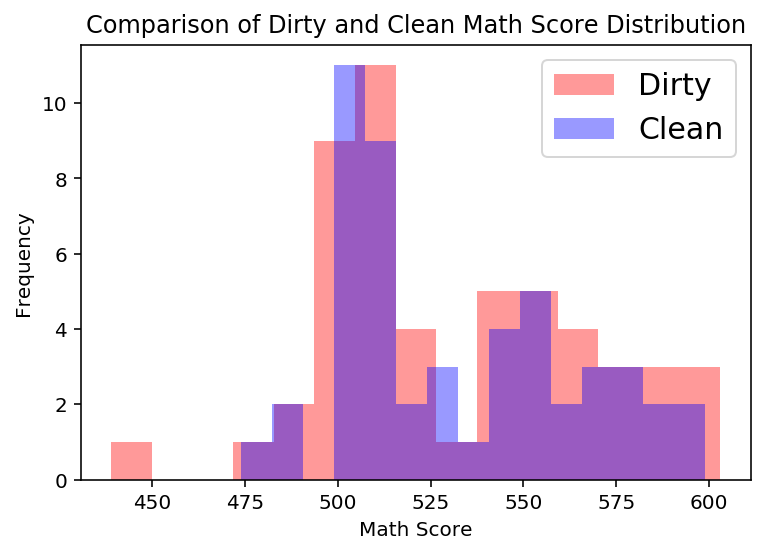

In [687]:
sns.distplot(sat2['Math'],bins=15, kde=False, label='Dirty', color='r')
sns.distplot(sat2['Math_new'], bins=15, kde=False, label='Clean', color='b')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Comparison of Dirty and Clean Math Score Distribution')
plt.legend(loc=1, prop={'size': 15})
plt.show()

After the outlier is removed, the standard deviation tightened(reduced). Hence, the cleaned data is more accurate.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
A correlation coefficient measures the extent to which two variables tend to change together. The coefficient describes both the strength and the direction of the relationship. 

Pearson product moment correlation
The Pearson correlation evaluates the linear relationship between two continuous variables. A relationship is linear when a change in one variable is associated with a proportional change in the other variable.

For example, you might use a Pearson correlation to evaluate whether increases in temperature at your production facility are associated with decreasing thickness of your chocolate coating.

Spearman rank-order correlation
The Spearman correlation evaluates the monotonic relationship between two continuous or ordinal variables. In a monotonic relationship, the variables tend to change together, but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data.

Spearman correlation is often used to evaluate relationships involving ordinal variables. For example, you might use a Spearman correlation to evaluate whether the order in which employees complete a test exercise is related to the number of months they have been employed.

2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!
![title](img/spearman.png)
For example say we need to know the Spearman co-relation between rating 1 and 2, at first we need ranked both of them from descending order( largest to lowest ). Then we take the difference and we will squared it to remove the negative. Lastly, we apply the Spearman formula.


In [688]:
#unable to use clean data because both shape must match

sat3=pd.read_csv('.\datasets\sat_scores.csv') #load csv to pandas
M=sat3['Math'].tolist()
V=sat3['Verbal'].tolist()

stats.spearmanr(M,V)


SpearmanrResult(correlation=0.9052048847940284, pvalue=3.235231959777518e-20)

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [689]:
R=sat3['Rate'].tolist()

sat3['Rate_Percent']=sat3['Rate'].apply(lambda x : stats.percentileofscore(R, x,kind='rank'))

In [690]:
sat3.iloc[23,:]

State                CA
Rate                 51
Verbal              498
Math                517
Rate_Percent    56.7308
Name: 23, dtype: object

It is related because the % is "ranked" based on the value. For example, max Rate is 82 hence it's 100% and 

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.